# $k$-Nearest Neighbors

The $k$ nearest neighbors ($k$-NN) algorithm is one of the simplest Data Mining methods. Despite being simple, it often produces satisfactory results. It can be used for both classification and regression problems.

$k$-NN is a [*lazy learning*](https://en.wikipedia.org/wiki/Lazy_learning#:~:text=In%20machine%20learning%2C%20lazy%20learning,training%20data%20before%20receiving%20queries.) algorithm. This means the training phase consists only of storing the representations of the examples. That is, the algorithm does not explicitly produce a classification model. The stored examples are later used to predict the class of new examples.

## Geometric interpretation of a *dataset*

A common characteristic of many Data Mining algorithms (for classification and for other tasks), $k$-NN included, is that they interpret each example in a dataset as a *geometric point*. See the following figure (taken from [here](https://www.mathplanet.com/education/geometry/points,-lines,-planes-and-angles/an-introduction-to-geometry)). 

![three points in 2D](https://www.mathplanet.com/Oldsite/media/43053/picture04.png)

To get a sense of this interpretation, consider our fictitious dataset for binary classification with 17 examples. Remember that each example has only two features, which means that each example is of the form $\mathbf{x} = [x_1, x_2]$. The code cell below presents this dataset as two separated numpy arrays, $X$ and $y$.

In [ ]:
import numpy as np

X = np.array([[-0.1, 1.4],
              [-0.5,-0.1],
              [ 1.3, 0.9],
              [-0.6, 0.4],
              [-1.5, 0.4],
              [ 0.2, 0.2],
              [-0.3,-0.4],
              [ 0.7,-0.8],
              [ 1.1,-1.5],
              [-1.0, 0.9],
              [-0.5,-1.5],
              [-1.3,-0.4],
              [-1.4,-1.2],
              [-0.9,-1.1],
              [ 0.4,-1.3],
              [-0.4, 0.6],
              [ 0.3,-0.5]])

y = np.array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1])

Since each example is represented by a pair of numbers, we can plot these examples for visualization purposes.

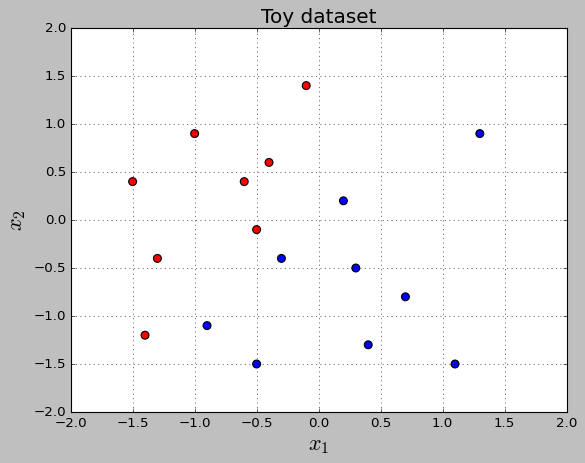

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
np.set_printoptions(precision=3, suppress=True)

colormap = np.array(['r', 'b'])

def plot_scatter(X, y, colormap):
  plt.grid()
  plt.xlim([-2.0, 2.0])
  plt.ylim([-2.0, 2.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Toy dataset', size=18)
  plt.scatter(X[:,0], X[:, 1], s=50, c=colormap[y])

plot_scatter(X, y, colormap)

In this plot, each point represents a example in our toy dataset. Also, we use colors blue and red to represent the class of each example.

The above example is for a 2-dimensional dataset so that we can visualize them. Nevertheless, this geometric interpretation can also be used for high dimensional datasets.

The geometric interpretation is useful because we can view the distance between two points as a kind of similarity measure between the corresponding examples: the closer the two points are, the more similar they are. 

The image below (source) illustrates this concept in the simple case of 2-dimensional points. But you should convince yourself that this interpretation of *distances as similarities* can be extended to $n$-dimensional examples $\mathbf{x} = [x_0, x_1, x_2, \cdots, x_n]$, $n > 2$. 

![Source: Wikipedia](http://chrisjmccormick.files.wordpress.com/2013/08/2d_euclidean_distance_illustration.png)

In the particular case of a binary classification task, consider that points $A$ and $B$ belong to the positive and negative classes, respectively. Then, if an unclassified point $C$ is closer to point $B$ than to point $A$, we would expect $C$ to belong to the negative class.


The following code cell presents a heatmap, which is a graphical way to inspect distance matrix. In general, a distance matrix shows the pairwise distances between points in a dataset.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


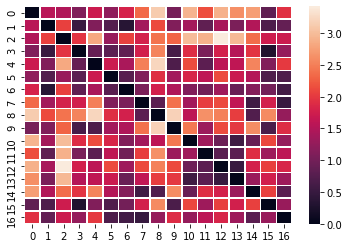

In [ ]:
from scipy.spatial import distance_matrix
import seaborn as sns
import matplotlib.pylab as plt

dists = distance_matrix(X, X)

ax = sns.heatmap(dists, linewidth=0.5)
plt.show()

In [ ]:
print(dists)

[[0.    1.552 1.487 1.118 1.72  1.237 1.811 2.341 3.138 1.03  2.927 2.163
  2.907 2.625 2.746 0.854 1.942]
 [1.552 0.    2.059 0.51  1.118 0.762 0.361 1.389 2.126 1.118 1.4   0.854
  1.421 1.077 1.5   0.707 0.894]
 [1.487 2.059 0.    1.965 2.844 1.304 2.062 1.803 2.408 2.3   3.    2.907
  3.421 2.973 2.377 1.726 1.72 ]
 [1.118 0.51  1.965 0.    0.9   0.825 0.854 1.769 2.55  0.64  1.903 1.063
  1.789 1.53  1.972 0.283 1.273]
 [1.72  1.118 2.844 0.9   0.    1.712 1.442 2.506 3.22  0.707 2.147 0.825
  1.603 1.616 2.55  1.118 2.012]
 [1.237 0.762 1.304 0.825 1.712 0.    0.781 1.118 1.924 1.389 1.838 1.616
  2.126 1.703 1.513 0.721 0.707]
 [1.811 0.361 2.062 0.854 1.442 0.781 0.    1.077 1.78  1.476 1.118 1.
  1.36  0.922 1.14  1.005 0.608]
 [2.341 1.389 1.803 1.769 2.506 1.118 1.077 0.    0.806 2.404 1.389 2.04
  2.138 1.628 0.583 1.78  0.5  ]
 [3.138 2.126 2.408 2.55  3.22  1.924 1.78  0.806 0.    3.189 1.6   2.64
  2.518 2.04  0.728 2.581 1.281]
 [1.03  1.118 2.3   0.64  0.707 1.389 1.47

In [ ]:
print(X[3,:])
print(X[15,:])
print(np.sqrt(np.square(X[3,0]-X[15,0]) + np.square(X[3,1]-X[15,1])))

[-0.6  0.4]
[-0.4  0.6]
0.28284271247461895


Usually, some [distance metric](https://en.wikipedia.org/wiki/Metric_(mathematics)) is used to compute the similarity between examples. Some popular metrics are listed below.

- Measures for continuous features:
 * Manhattan distance 
 * Euclidean distance
 * Cosine similarity

- Measures for discrete features:
 * Hamming distance
 * Value distance measure

See this [link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html) for more alternatives to compute the similarity between to points.

## Definition of neighbors

A fundamental concept in $k$-NN corresponds to the set of “neighbors” of a given example $\mathbf{x}$. The meaning of neighbor here is in the context of *similarity*. The similarities between $\mathbf{x}$ and all the other examples in the data matrix $X$ are computed. Then, given a pre-defined positive integer $k$, the "neighborhood" of $\mathbf{x}$ is defined as the set of $k$ examples most similar to $\mathbf{x}$. This set is also called "$k$-neighborhood" of $\mathbf{x}$.

To classify an example $\mathbf{x}$, $k$-NN uses the classes of the $k$ examples in the neighborhood $\mathbf{x}$. 

The following figure ([source](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)) illustrates the behavior of $k$-NN for $k = 1$ in the context of binary classification. Notice that there is only one example inside the ball of neighbors for $\mathbf{x}$. Hence $1$-NN would predict that $\mathbf{x}$ belongs to the *red* class.

![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png)

In the case where $k$ is chosen to be greater than 1, then the [majority rule](https://en.wikipedia.org/wiki/Majority_rule) is applied to predict the class of $\mathbf{x}$. As an example, see the image below for the case $k=3$.

![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)


Notice that $k$-NN can be interpreted as a probabilistic classifier. To see this, let us consider againg the fictitious dataset depicted in the image below.

![alt text](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)

Considering that $k=3$, we can estimate the probabilities that the example do be predicted (represented by the question mark in the image) is either positive or negative.

\begin{align}
  Pr(pos) &= 2/3 \\
  Pr(neg) &= 1/3
\end{align}

Hence, as in logistic regression, we can infer the class for the new example as being the most probable one. In such fictitious dataset, the new example would be predicted to be a positive one.




The animation below illustrates the behavior of $k$-NN in a toy dataset with two predictive features and two classes.

In [ ]:
from IPython.display import HTML

HTML("""
<video width="640" height="480" controls>
  <source src="https://assets.yihui.name/figures/animation/example/knn-ani/demo-a.mp4?dl=1" type="video/mp4">
</video>
""")

## Steps of the Algorithm (inference phase)

* Compute the $k$ neighborhood for an example $\mathbf{x}$. i.e., determine the $k$ “nearest” neighboring examples of $\mathbf{x}$.

* Count the amount $q(c_i)$ of examples in the $k$-neighborhood that belong to the class $c_i$.

* Produce an estimate of $\Pr(c_i \mid \mathbf{x})$:

* Classify $\mathbf{x}$ as belonging to the most likely class (called the *majority class*).

No optimal number of neighbors suits all kind of datasets. The value of $k$ for a particular dataset can be determined using *model selection*, which is a concept we will cover later on in this course.

## Class sklearn.KNeighborsClassifier

Scikit-Learn's [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class implements the $k$-NN algorithm. In its simplest form of instantiation, it is only necessary to configure the hyperparameter $k$, which corresponds to the number of neighbors.

As an example, tes us consider the Iris Flower dataset again. The code cell below build a kNN classifier for this dataset.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn import datasets
iris = datasets.load_iris()

X = iris.data    # data matrix
y = iris.target  # response vector

train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.2)

modelKNN = KNeighborsClassifier(n_neighbors=3) # k = 3

modelKNN.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

To apply the model, we just call `predict`. For example, consider that we want to classify example $\mathbf{x} = [1.1, 1.2, 3, 2]$

In [ ]:
# predict the class for example x = [1.1, 1.2, 3, 2] 
x = [1.1, 1.2, 3, 2]
print(modelKNN.predict([x]))

[1]


Notice that we can predict the classes for a bunch of examples.

In [ ]:
y_pred = modelKNN.predict(test_X)

# Print predicted class for examples in test set
print(y_pred)

[2 2 0 0 0 2 1 2 1 0 1 2 0 2 1 2 2 0 1 2 2 0 1 2 2 0 2 2 0 0]


As we said before, kNN produces a probabilistic classifier. Indeed, we can inspect the probabilities the classifier associates to each class for a given test example. This is illustrated in the code cell below.

In [ ]:
y_pred_prob = modelKNN.predict_proba([x])

# Print predicted class for examples in test set
print(y_pred_prob)

[[0.         0.66666667 0.33333333]]


## Class KNeighborsRegressor

When $k$-NN is used for regression, the target values of the neighbors are averaged to computed the predicted value for the query point. The image below ([source](https://www.jeremyjordan.me/k-nearest-neighbors/)) illustrates this. On the right, we have $k$-NN in a classification context. In this case, the majority rule is applied. On the left, we have $k$-NN for regression. Is this case, the simple average of the three neighbors is used as the predicted value.

![alt text](https://www.jeremyjordan.me/content/images/2017/06/Screen-Shot-2017-06-17-at-9.30.39-AM-1.png)

A more general version of $k$-NN algorithm, called *distance weighted k-NN* can be used for producing a regression model. This algorithm computes weights $w_i$ ($1 \leq i \leq k$) associated with neighbors of a query example $x_q$ using the equation below, in which $d(x_q, x_i)$ is the distance between the query point $x_q$ and other point $x_i$ in the training set.

$$
w_i = \frac{1}{d(x_q, x_i)^2}
$$

After the weights are computed, the predicted value $\hat{y}_q$ for the query point $x_q$ is computed as follows:

$$
\hat{y}_q \leftarrow \frac{\sum_{i=1}^{k} w_i \times y_i}{\sum_{i=1}^{k} w_i}
$$

In the above expression, $y_i$ is the target value for the $i$-th neighbor. This way, the predicted value $\hat{y}_q$ is a weighted sum of the target values for the neighbors. Notice that this gives the most weight to the data points nearest to $x_q$, and the least weight to the data points that are furthest away. 

In this variant of $k$-NN for regression, it makes sense to use all training examples as neighbors (that is $k$ equals the size of the training set).

In Scikit-Learn, the class [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) implements the version of $k$-NN for regression. See the example below, which shows how to apply this class to the [Boston house price](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) dataset.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

dataset = load_boston()
print(dataset.keys())

boston_df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
print(boston_df.head(3))

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=31)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


boston_df = pd.DataFrame(X_train_scaled, columns = dataset.feature_names)
print(boston_df.head(3))

# In a practical setting, n_neighbors has to be defined using model selection.
model = KNeighborsRegressor(n_neighbors = 15, weights = 'distance')

model.fit(X_train_scaled, y_train)  #fit the model
y_pred = model.predict(X_test_scaled) #make prediction on test set
    
error = sqrt(mean_squared_error(y_test, y_pred)) #calculate rmse
rmse_val.append(error) #store rmse values
print('RMSE value for k=%d is %.2f' % (K, error))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03

[3 rows x 13 columns]
       CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0 -0.389279  3.411723 -1.329831  ... -0.561453  0.294711 -1.125821
1 -0.386258  0.716968  0.573843  ... -0.028004  0.436368 -0.262037
2 -0.380684  0.369258 -0.607546  ...  0.149813  0.373055  0.171983

[3 rows x 13 columns]
RMSE value for k=50 is 4.37


In [ ]:
#predicting on the test set
predict = model.predict(X_test_scaled)
print(predict)

[28.26747942 14.71900206 22.22464171 20.25913378 22.55997755 23.76476085
 13.9564192  25.13218819 23.91897183 22.26196039 15.23535039 18.17024123
 18.23860928 18.57418054 14.90285359 22.62031379 22.22298975 24.28472557
 23.38714521 27.68573961 19.34440264 16.57569257 26.36501906 29.39533489
 19.99769016 20.48449326 19.97995391 22.01996112 18.98628072 24.35633002
 27.9751017  16.70884491 16.59987662 18.64992673 23.45839919 20.85547024
 27.96744737 15.80057434 15.66912717 33.35098665 12.91528709 14.40524538
 17.15206845 28.77957093 18.93500128 21.10546579 27.13052839 19.59420048
 23.29496988 25.89620951 20.07652377 18.66381045 14.15834116 28.78633783
 19.04068122 19.72884966 14.56846461 17.68683052 15.6610228  26.3116879
 17.88044938 15.57814121 22.0406903  26.082238   14.16450925 13.20187139
 23.44336993 17.73956265 26.55035112 22.81010453 19.61153444 17.04552692
 30.00557596 21.44512993 17.65988084 29.84009712 22.35672644 21.72681936
 18.15555704 21.66996167 31.63046401 24.83412266 26.

## kNN – Inductive Bias

The inductive bias of a learning algorithm refers to the **assumptions it makes about the shape of the target function** in order to generalize from finite data.

kNN **assumes that instances close in the feature space have similar labels**.

In other words, it is based on the idea that **the target function is locally constant or smooth**:  
- For classification: objects with the same label are clustered together.  
- For regression: similar values occur near each other.

> "Nearby instances should have similar target values."

## Final remarks

- Contrary to what one might think, $k$-NN can produce very complex decision boundaries. Therefore, despite being a simple algorithm, $k$-NN can produce very sofisticated classifiers. The following images illustrate this behavior of the algorithm.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Coloured_Voronoi_2D.svg/220px-Coloured_Voronoi_2D.svg.png)

[source](https://pt.wikipedia.org/wiki/Diagrama_de_Voronoy)

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Voronoi_growth_euclidean.gif/220px-Voronoi_growth_euclidean.gif)

[source](https://en.wikipedia.org/wiki/Voronoi_diagram)

- Another advantage of $k$-NN is that the classification model is continuously updated as new example become available. This is in contrast to [eager learning algorithms](https://en.wikipedia.org/wiki/Eager_learning) that explicitly fit a model to be later used in inference.

- One downside of $k$-NN is that it can suffer from the curse of dimensionality if the amount of features in the dataset is too large. One approach to mitigate this problem is to use [dimensionality reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction) methods as a pre-processing step.